<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

%matplotlib inline

Загрузим датасет о ценах на дома в Бостоне. 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [3]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [4]:
np.dot(x1, x2)

234704.86490859918

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [5]:
pd.DataFrame(boston.data, columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


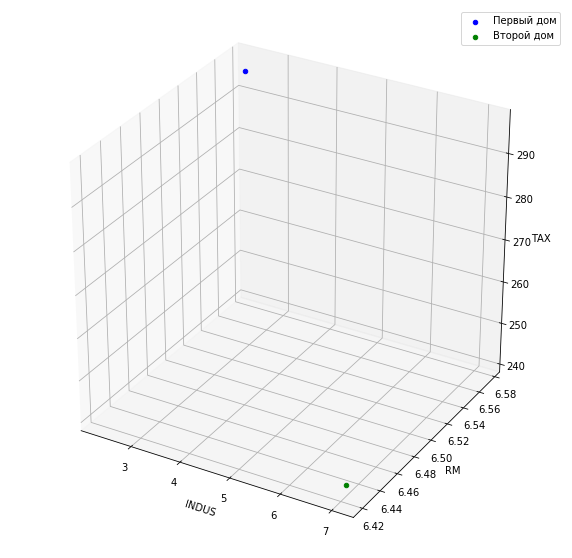

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

INDUS_idx, RM_idx, TAX_idx = 2,5,9

h1 = ax.scatter(x1[INDUS_idx], x1[RM_idx], x1[TAX_idx], c='b', marker='o', )
h2 = ax.scatter(x2[INDUS_idx], x2[RM_idx], x2[TAX_idx], c='g', marker='o')

ax.set_xlabel('INDUS')
ax.set_ylabel('RM')
ax.set_zlabel('TAX')

plt.legend((h1, h2), ("Первый дом", "Второй дом"))
plt.show()

Найти косинус угла между векторами x1 и x2

Выразим косинус угла из следующих формул
$\vec a \cdot \vec b = |\vec a | | \vec b | \cos(\alpha)$, 
$\vec a \cdot \vec b = \sum_{i=0}^n {a_i b_i}$
<br>
$\Longrightarrow \cos(\alpha) = \frac{\sum_{i=0}^n {a_i b_i}}{|\vec a | \cdot | \vec b |}$

In [7]:
x1.dot(x2) / math.sqrt(x1.dot(x1) * x2.dot(x2))

0.9942969986163621

Найти расстояние между точками x1 и x2.

In [8]:
dx = x1 - x2
math.sqrt(dx.dot(dx))

58.955079696240766

# Задание повышенного уровня.

Задан объект в пространстве 2D.

In [9]:
def draw_figure(A, Am=None, hlim=None, vlim=None):
    plt.axis('equal')
    plt.plot(A[:,0], A[:,1], linewidth=2, color = 'green')
    if Am is not None:
        plt.plot(Am[:,0], Am[:,1], linewidth=6, color = 'red', alpha=0.5)
        
    plt.ylim([-200, 200] if hlim is None else hlim)
    plt.xlim([-200, 200] if vlim is None else vlim)
    plt.show()
    
def modify_points(A, m):
    return np.array([np.dot(m, np.transpose(p)) for p in A])

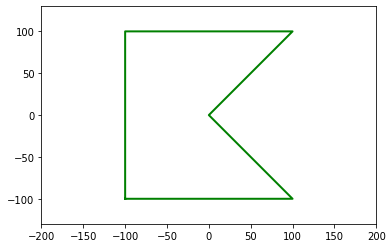

In [10]:
A = np.array([
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ])

draw_figure(A)

Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

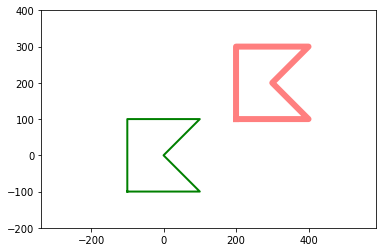

In [11]:
TranslateMatrix = [
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]
]
Am = modify_points(A, TranslateMatrix)
draw_figure(A, Am, hlim=[-200, 400], vlim=[-150, 400])

Уменьшить объект в два раза.

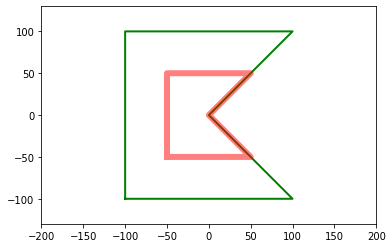

In [12]:
ScaleMatrix = [
    [.5, 0, 0],
    [0, .5, 0],
    [0, 0, 1]
]
Am = modify_points(A, ScaleMatrix)
draw_figure(A, Am)

Повернуть на 130 градусов.

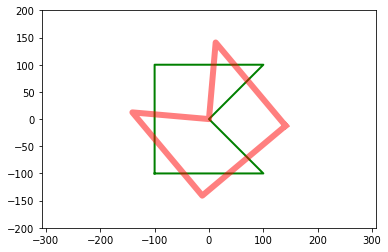

In [13]:
alpha = 130
sv = math.sin(math.radians(alpha))
cv = math.cos(math.radians(alpha))
RotateMatrix = [
    [cv, -sv, 0],
    [sv, cv, 0],
    [0, 0, 1]
]
Am = modify_points(A, RotateMatrix)
draw_figure(A, Am)

Отразить объект относительно прямой y=x

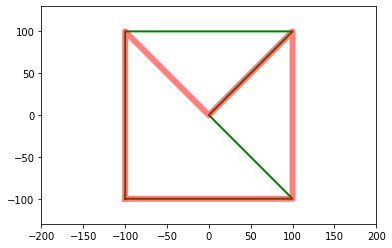

In [14]:
FlipMatrix = [
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
]
Am = modify_points(A, FlipMatrix)
draw_figure(A, Am)